**Business Objective:**
Develop a predictive model to estimate the medical insurance costs for individuals based on various parameters including age, sex, BMI, children, smoking status, and residential region.
Attributes/Columns:
1.	age: age of primary beneficiary
2.	sex: insurance contractor gender, female, male
3.	Bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
4.	children: Number of children covered by health insurance / Number of dependents
5.	smoker: Smoking
6.	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
7.	charges: Individual medical costs billed by health insurance
Target: Need to predict insurance costs accurately.


Data reading

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [113]:
df = pd.read_excel("insurance.xlsx")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [114]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [116]:
df.shape

(1338, 7)

In [117]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [118]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [119]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [120]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [121]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [122]:
df.duplicated().sum()

1

In [123]:
#  find the which column has duplicate value

df[df.duplicated()]


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [124]:


df = df.drop_duplicates()


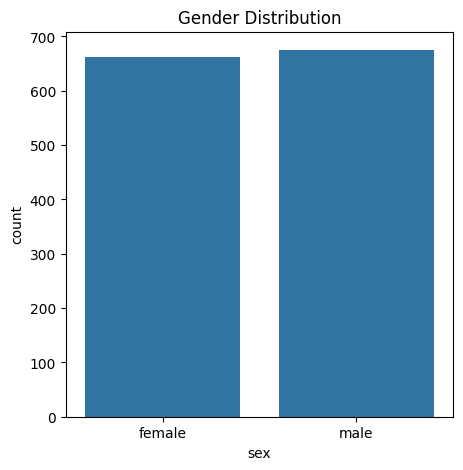

In [125]:
plt.figure(figsize=(5,5))

sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

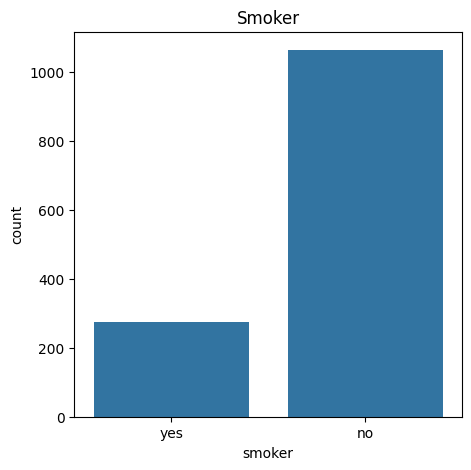

In [126]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

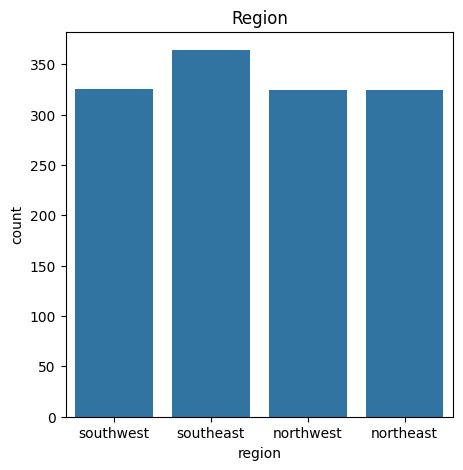

In [127]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

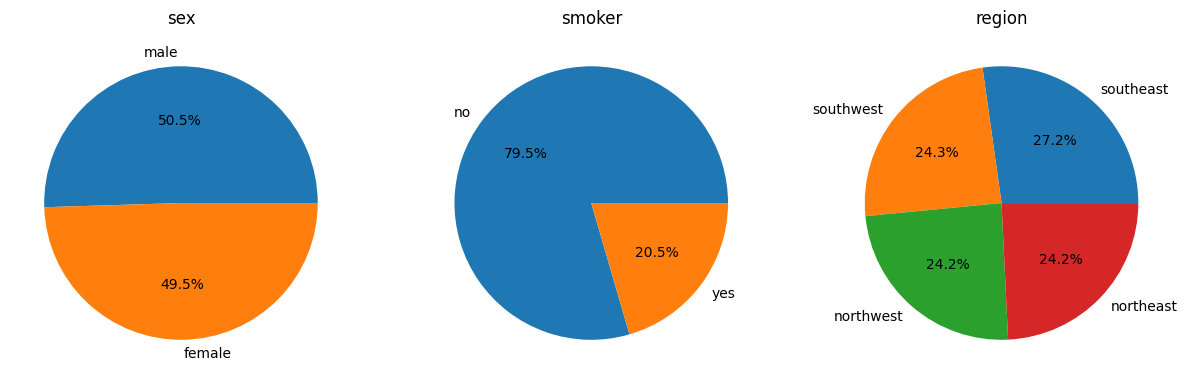

In [128]:


import matplotlib.pyplot as plt

# Create a figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over the categorical columns
for i, col in enumerate(['sex', 'smoker', 'region']):
    # Get the value counts for the column
    counts = df[col].value_counts()

    # Create a pie chart
    axs[i].pie(counts.values, labels=counts.index, autopct='%1.1f%%')

    # Set the title of the pie chart
    axs[i].set_title(col)

# Display the plot
plt.show()


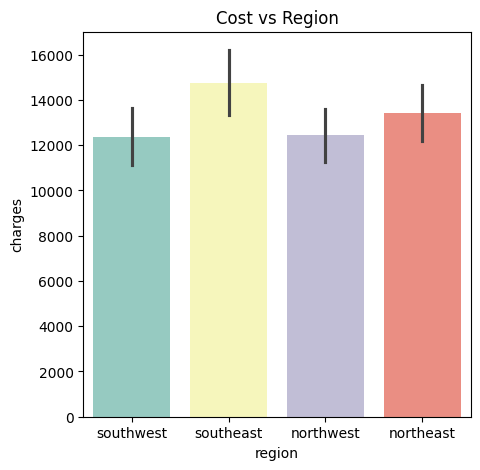

In [129]:


import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=df, palette="Set3")
plt.title('Cost vs Region')
plt.show()


**Charges are approximately the same in the given four regions.lightly high southeast**

Text(0.5, 1.0, 'Charges for smokers')

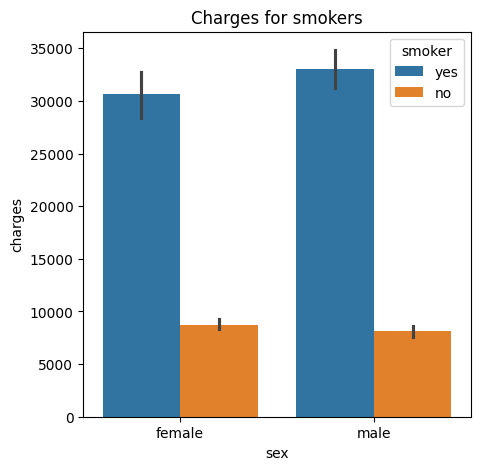

In [130]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

**smokers are increased charges also incresed**

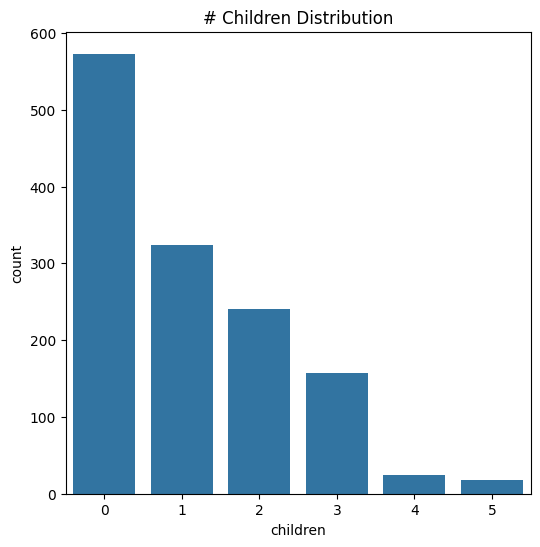

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [131]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data = df)
plt.title('# Children Distribution')
plt.show()
df['children'].value_counts()

In [132]:
import warnings
warnings.filterwarnings("ignore")

In [133]:
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

Text(0, 0.5, 'Count')

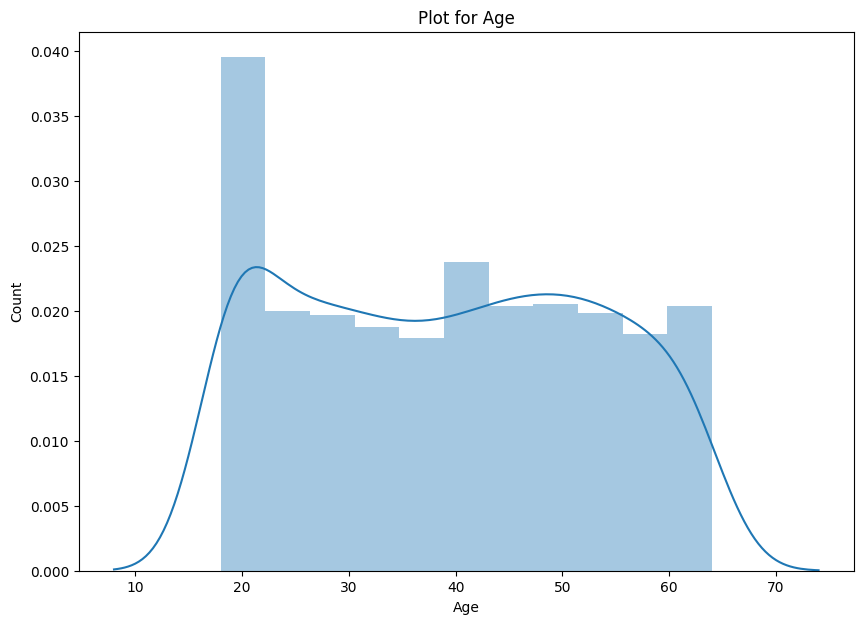

In [134]:
plt.figure(figsize=(10,7))
sns.distplot(df['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

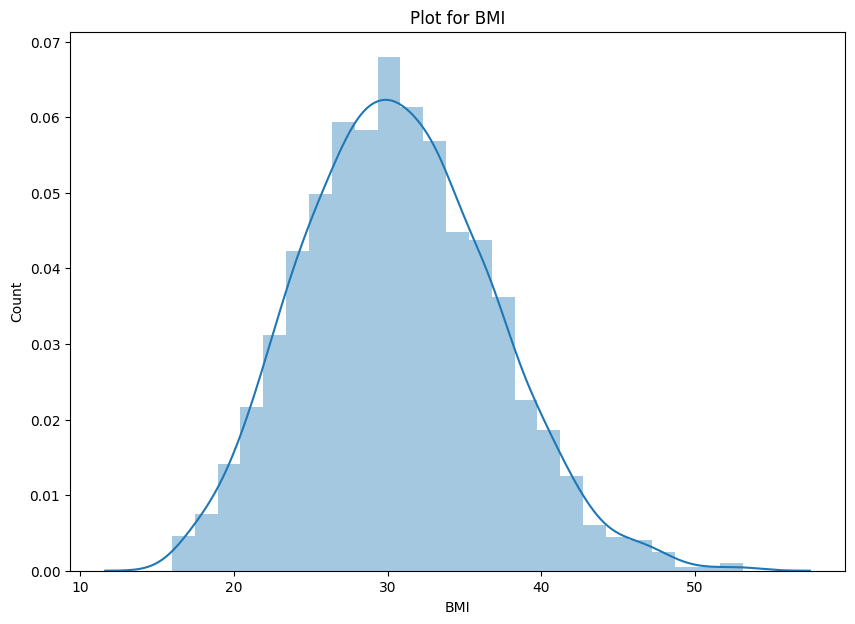

In [135]:
plt.figure(figsize=(10,7))
sns.distplot(df['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

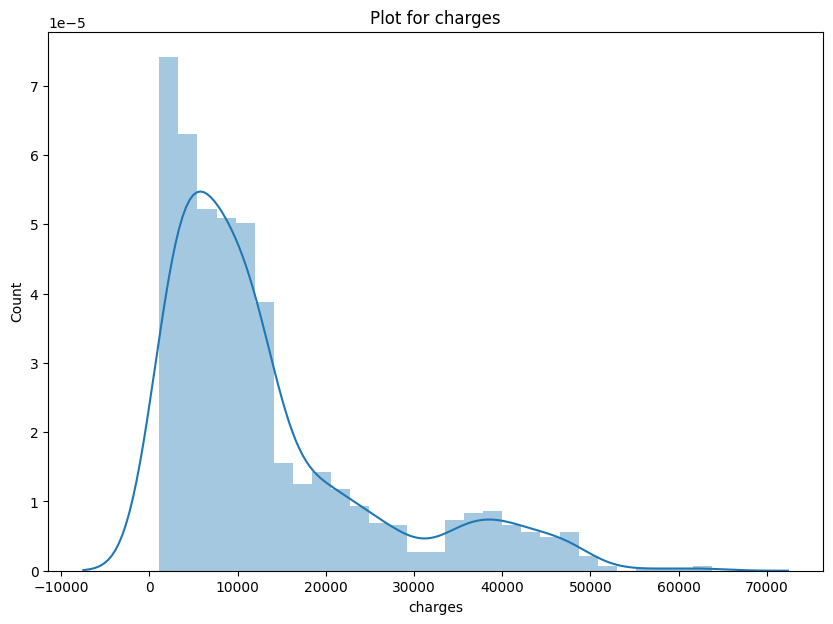

In [136]:
plt.figure(figsize=(10,7))
sns.distplot(df['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

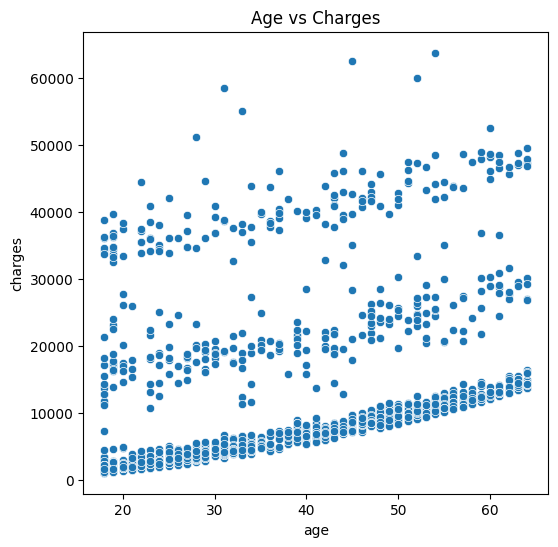

In [137]:


import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.show()


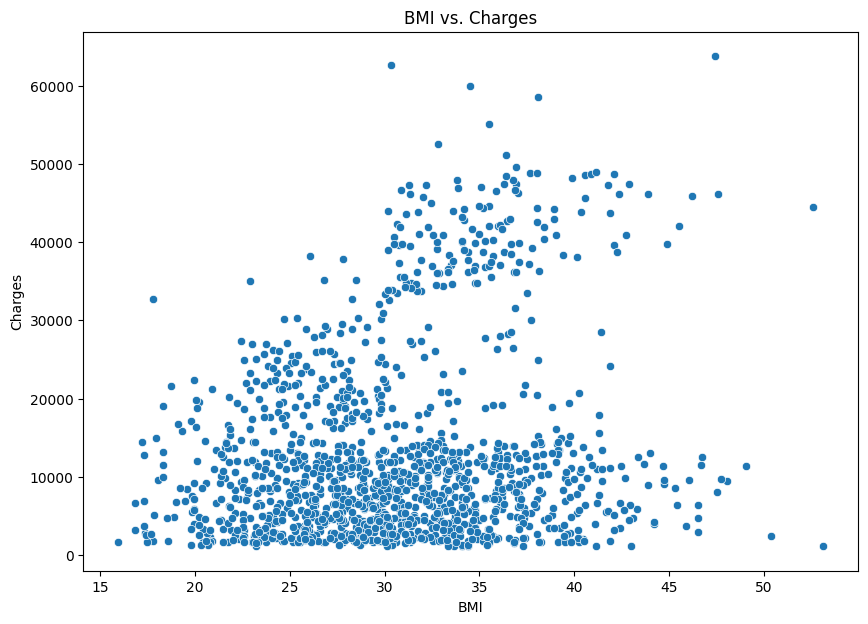

In [138]:


import matplotlib.pyplot as plt
# Scatterplot of BMI vs. Charges
plt.figure(figsize=(10, 7))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


As bmi increases, the charges tend to increase slightly as well

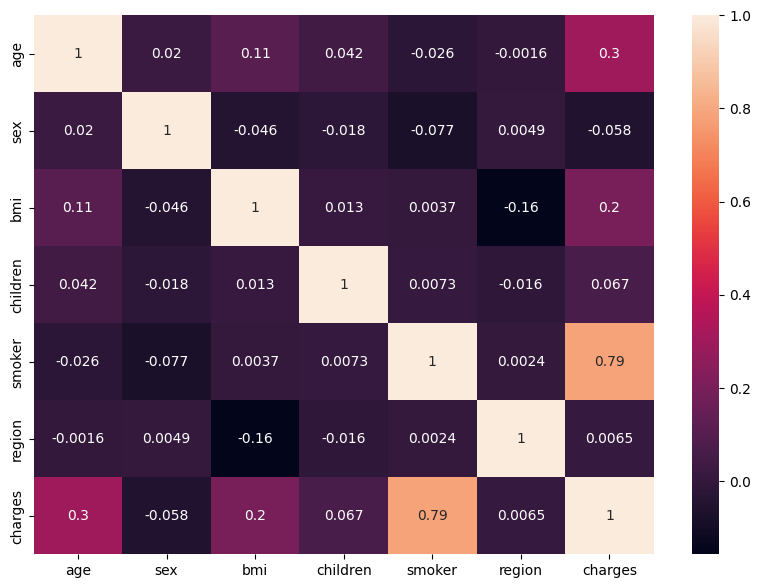

In [139]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

Positive correlation between:

1.smokers and charges (79%) - smokers have the highest charges          
2.age and charges (30%)                                                 
3.bmi and charges (20%)


**Smoker, BMI and Age are most important factor that determnines - Charges**
Also we see that Sex, Children and Region do not affect the Charges, these 3 columns as they have less correlation

**FIND THE OUTLIERS AND HANDLE THE OULIERS**

<Axes: ylabel='age'>

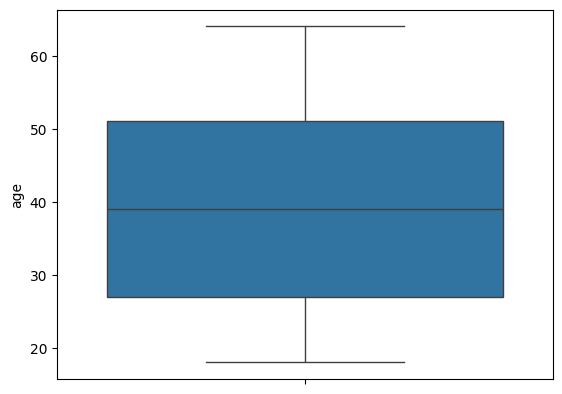

In [140]:
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

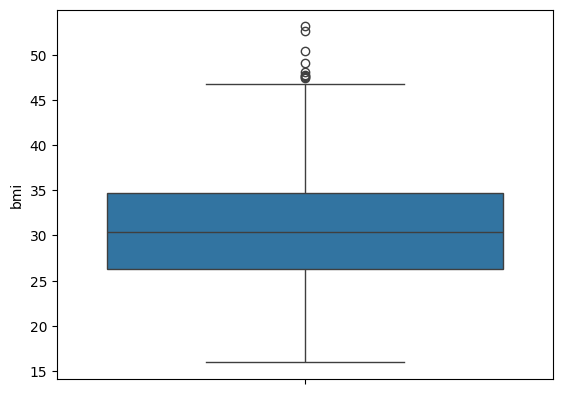

In [141]:
sns.boxplot(df['bmi'])

In [142]:
# Using IQR method for outlier detection


Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


In [143]:
!pip install feature_engine

In [144]:
from feature_engine.outliers import ArbitraryOutlierCapper

<Axes: ylabel='bmi'>

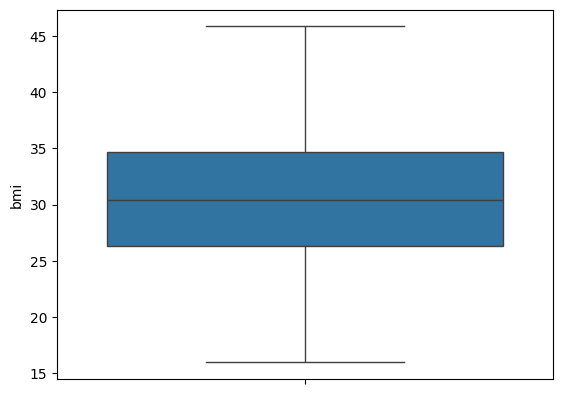

In [145]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.77},max_capping_dict={'bmi':45.85})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

In [146]:
df.shape

(1337, 7)

In [147]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


<Axes: >

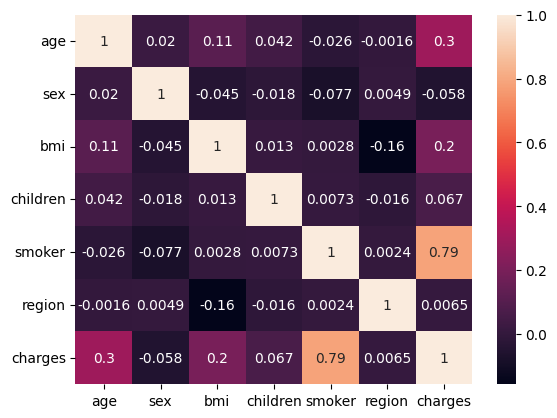

In [148]:
sns.heatmap(df.corr(),annot=True)

In [149]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


# Modeling

In [150]:
# Dividing the data into Training and Testing Data

from sklearn.model_selection import train_test_split
X=df.drop('charges',axis=1)
y=df['charges']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)
X_train.shape,X_test.shape,y_train.shape,y_test.shape



((1069, 6), (268, 6), (1069,), (268,))

In our dataset We have age,bmi columns were value is not in proper scale and other column have value in proper format, So we will apply MinMaxScaler Scaling.

In [151]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


# Linear Regression

In [152]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import MinMaxScaler

step1_preprocess = ColumnTransformer(transformers=[
    ('stand',MinMaxScaler(),[0,2])],remainder='passthrough')


In [153]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

pipe_lr = Pipeline([
    ('step1_preprocess', step1_preprocess),
    ('model', model)
])

In [154]:
# Training Accuracy for Linear Regression


from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error

pipe_lr.fit(X_train,y_train)
y_pred_train = pipe_lr.predict(X_train)
print('R2_Score',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_train,y_pred_train))
print("RMSE",root_mean_squared_error(y_train,y_pred_train))

R2_Score 0.7489165495707186
MAE 4224.291858569918
RMSE 6038.799037372722


In [155]:
# Testing Accuracy for Linear Regression

from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error
y_pred_Lr = pipe_lr.predict(X_test)
print('R2_Score',r2_score(y_test,y_pred_Lr))
print('MAE',mean_absolute_error(y_test,y_pred_Lr))
print("RMSE",root_mean_squared_error(y_test,y_pred_Lr))

R2_Score 0.754878758544071
MAE 4130.931002977002
RMSE 6098.449379824753


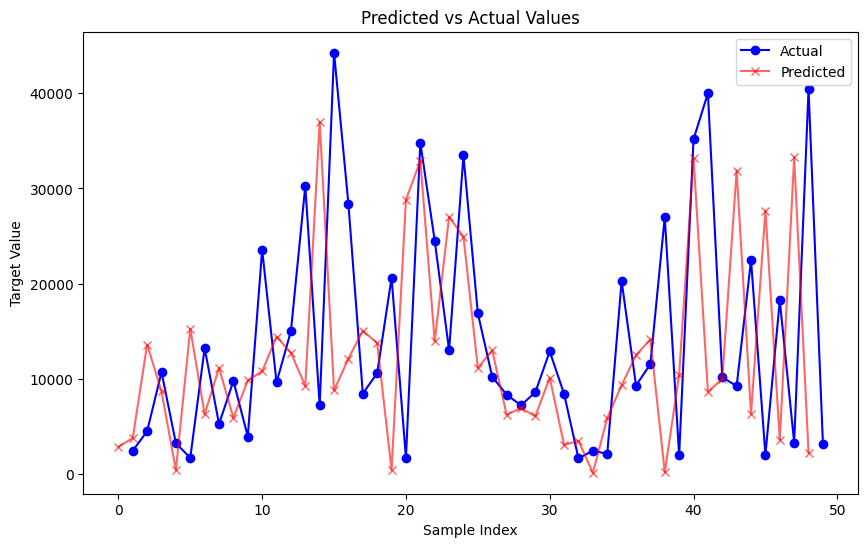

In [156]:
# Plot for Linear Regression model between Actual values and predicted values for first 50 values of y_test 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting actual values
plt.plot(y_test.reset_index(drop=True)[1:50], label='Actual', color='blue', marker='o')

# Plotting predicted values
plt.plot(y_pred_Lr[1:50], label='Predicted', color='red', alpha=0.6, marker='x')

plt.title('Predicted vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

# Ridge Regression

In [157]:
step1_preprocess = ColumnTransformer(transformers=[
    ('stand',MinMaxScaler(),[0,2])],remainder='passthrough')


In [158]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=5)

pipe_ridge = Pipeline([('step1_preprocess',step1_preprocess),
                       ('model',model)])

In [159]:
# training Accuracy for Ridge regression

from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error

pipe_ridge.fit(X_train,y_train)
y_pred_train = pipe_ridge.predict(X_train)
print('R2_Score',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_train,y_pred_train))
print("RMSE",root_mean_squared_error(y_train,y_pred_train))

R2_Score 0.7479772973073089
MAE 4224.211009285971
RMSE 6050.083455249974


In [160]:
# Testing accuracy for Ridge regression

y_pred_ridge = pipe_ridge.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred_ridge))
print('MAE',mean_absolute_error(y_test,y_pred_ridge))
print("RMSE",root_mean_squared_error(y_test,y_pred_ridge))

R2 Score 0.7508837625456537
MAE 4142.56236948545
RMSE 6147.944913303642


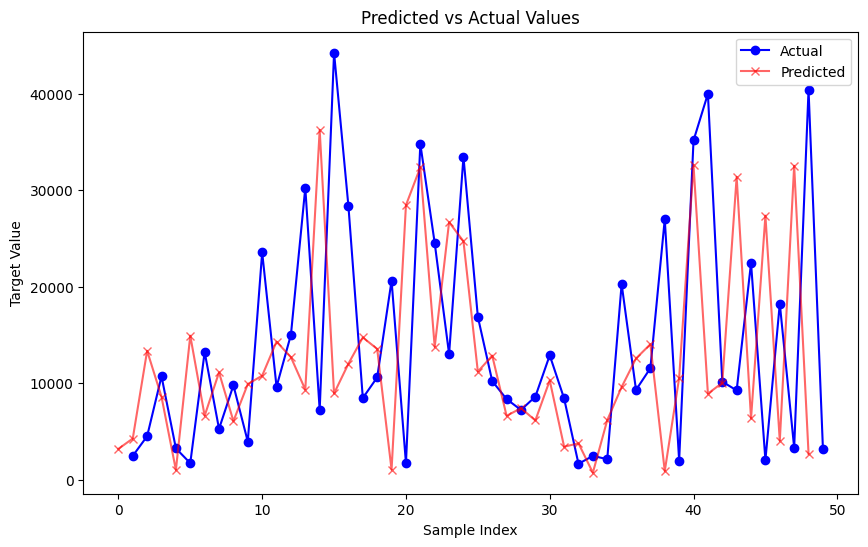

In [161]:
# Plot for Ridge Regression model between Actual values and predicted values for first 50 values of y_test 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting actual values
plt.plot(y_test.reset_index(drop=True)[1:50], label='Actual', color='blue', marker='o')

# Plotting predicted values
plt.plot(y_pred_ridge[1:50], label='Predicted', color='red', alpha=0.6, marker='x')

plt.title('Predicted vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

# Lasso Regression

In [162]:
step1_preprocess = ColumnTransformer(transformers=[
    ('stand',MinMaxScaler(),[0,2])],remainder='passthrough')


In [163]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.001)

pipe_lasso = Pipeline([('step1_preprocess',step1_preprocess),
                       ('model',model)])

In [164]:
# Training Accuracy for Lasso regression

from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error

pipe_lasso.fit(X_train,y_train)
y_pred_train = pipe_lasso.predict(X_train)
print('R2_Score',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_train,y_pred_train))
print("RMSE",root_mean_squared_error(y_train,y_pred_train))

R2_Score 0.7489165495704293
MAE 4224.290971946208
RMSE 6038.799037376201


In [165]:
# Testing Accuracy for Lasso regression

y_pred_lasso = pipe_lasso.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred_lasso))
print('MAE',mean_absolute_error(y_test,y_pred_lasso))
print("RMSE",root_mean_squared_error(y_test,y_pred_lasso))

R2 Score 0.7548787375439014
MAE 4130.929908492483
RMSE 6098.449641059698


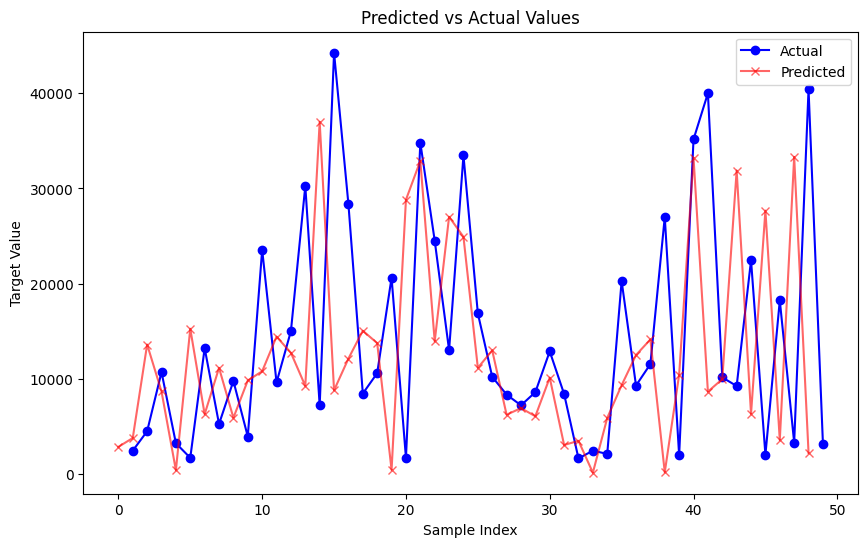

In [166]:
# Plot for Lasso Regression model between Actual values and predicted values for first 50 values of y_test 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting actual values
plt.plot(y_test.reset_index(drop=True)[1:50], label='Actual', color='blue', marker='o')

# Plotting predicted values
plt.plot(y_pred_lasso[1:50], label='Predicted', color='red', alpha=0.6, marker='x')

plt.title('Predicted vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

# KNeighborsRegression

In [167]:
step1_preprocess = ColumnTransformer(transformers=[
    ('stand',MinMaxScaler(),[0,2])],remainder='passthrough')


In [168]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)

pipe_knn = Pipeline([('step1_preprocess',step1_preprocess),
                       ('model',model)])

In [169]:
# Fitting Model and it's Training Accuracy

from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error

pipe_knn.fit(X_train,y_train)

y_pred_train = pipe_knn.predict(X_train)
print('R2_Score',r2_score(y_train,y_pred_train))
print('MAE', mean_absolute_error(y_train, y_pred_train))
rmse= root_mean_squared_error(y_train, y_pred_train)
print("Root Mean Squared Error: %s"% rmse)


R2_Score 0.8105844656441402
MAE 3189.826210595697
Root Mean Squared Error: 5245.0463433729


In [170]:
# Testing Accuracy for the K-Nearest Neighbors
pipe_knn.fit(X_train,y_train)
y_pred_knn = pipe_knn.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred_knn))
print('MAE',mean_absolute_error(y_test,y_pred_knn))
print("RMSE",root_mean_squared_error(y_test,y_pred_knn))

R2 Score 0.7160741847525587
MAE 4009.4520631888063
RMSE 6563.4380475651


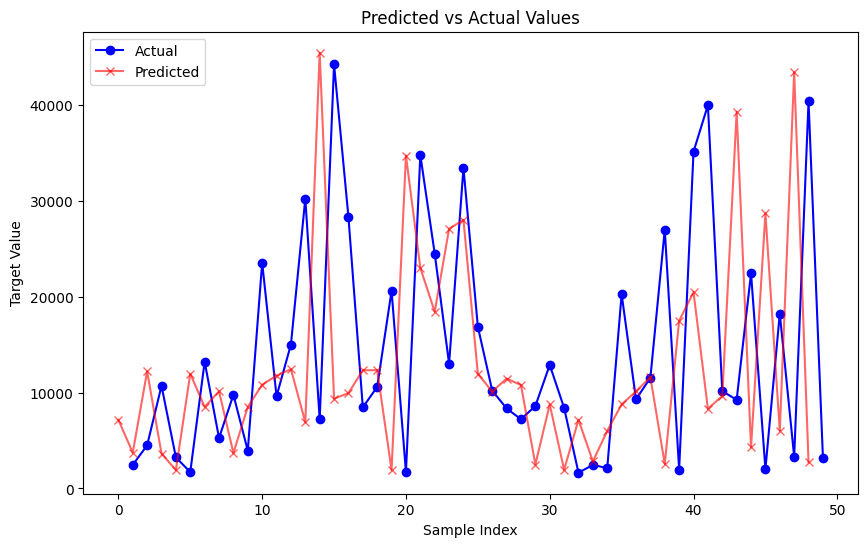

In [171]:
# Plot for K-NearestNeighborRegression model between Actual values and predicted values for first 50 values of y_test 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting actual values
plt.plot(y_test.reset_index(drop=True)[1:50], label='Actual', color='blue', marker='o')

# Plotting predicted values
plt.plot(y_pred_knn[1:50], label='Predicted', color='red', alpha=0.6, marker='x')

plt.title('Predicted vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

# Decision Tree Regression

In [172]:
step1_preprocess = ColumnTransformer(transformers=[
    ('stand',MinMaxScaler(),[0,2])],remainder='passthrough')


In [173]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3)

pipe_dt = Pipeline([('step1_preprocess',step1_preprocess),
                       ('model',model)])

In [174]:
# Fitting Decison Tree Model and It's Training Accuracy 

pipe_dt.fit(X_train,y_train)
y_pred_train = pipe_dt.predict(X_train)
print('R2_Score',r2_score(y_train,y_pred_train))
print('MAE', mean_absolute_error(y_train, y_pred_train))
rmse= root_mean_squared_error(y_train, y_pred_train)
print("Root Mean Squared Error: %s"% rmse)


R2_Score 0.8606386794442414
MAE 2682.0213812748952
Root Mean Squared Error: 4498.965466043079


In [175]:
# Testing Accuracy For Decision Tree Regressor Model

y_pred_dc = pipe_dt.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred_dc))
print('MAE',mean_absolute_error(y_test,y_pred_dc))
print("RMSE",root_mean_squared_error(y_test,y_pred_dc))

R2 Score 0.8390752405311273
MAE 3016.871538759546
RMSE 4941.290465169473


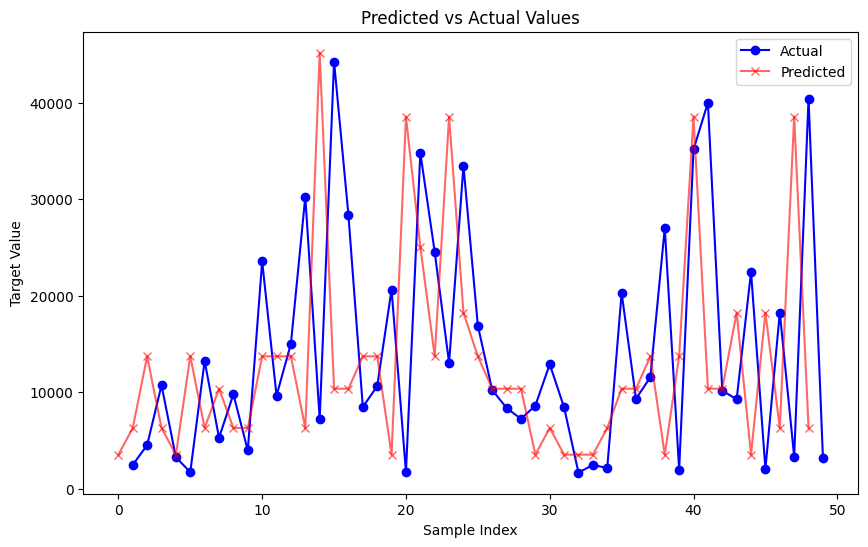

In [176]:
# Plot for Linear Regression model between Actual values and predicted values for first 50 values of y_test 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting actual values
plt.plot(y_test.reset_index(drop=True)[1:50], label='Actual', color='blue', marker='o')

# Plotting predicted values
plt.plot(y_pred_dc[1:50], label='Predicted', color='red', alpha=0.6, marker='x')

plt.title('Predicted vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

# Random Forest Regression

In [177]:
step1_preprocess = ColumnTransformer(transformers=[
    ('stand',MinMaxScaler(),[0,2])],remainder='passthrough')


In [178]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit,RandomizedSearchCV
from scipy.stats import randint as randint

model = RandomForestRegressor(random_state=3)

pipe_rf = Pipeline([('step1_preprocess',step1_preprocess),
                       ('model',model)])
# Perfroming Hyperparameter Tuning for Getting Best Values for randomForest Regressor

param_grid = {
    'model__n_estimators': randint(50, 400),  # Randomly select between 50 and 200
    'model__max_depth': randint(10, 50),  # Randomly select between 10 and 50
    'model__max_features': [0.5, 0.75],  # Random choice among these
    'model__max_samples': [0.5, 0.75, None]  # Random choice among these

}

# Randomized Search CV setup
random_search = RandomizedSearchCV(pipe_rf, param_distributions=param_grid,cv=5, verbose=2, n_jobs=-1)

# Perform the Randomized Search
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", random_search.best_params_)

# Fit the model to the training data
model_rf_best = RandomForestRegressor(
    n_estimators=random_search.best_params_['model__n_estimators'],
    max_depth=random_search.best_params_['model__max_depth'],
    max_features=random_search.best_params_['model__max_features'],
    max_samples=random_search.best_params_['model__max_samples'],
    random_state=3
)
pipe_rf = Pipeline([('step1_preprocess',step1_preprocess),
                       ('model',model_rf_best)])
pipe_rf.fit(X_train,y_train)
y_pred_rf = pipe_rf.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred_rf))
print('MAE',mean_absolute_error(y_test,y_pred_rf))
print("RMSE",root_mean_squared_error(y_test,y_pred_rf))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


Best parameters: {'model__max_depth': 22, 'model__max_features': 0.5, 'model__max_samples': 0.5, 'model__n_estimators': 244}
R2 Score 0.850534083574843
MAE 2659.7019947419444
RMSE 4762.116702282062


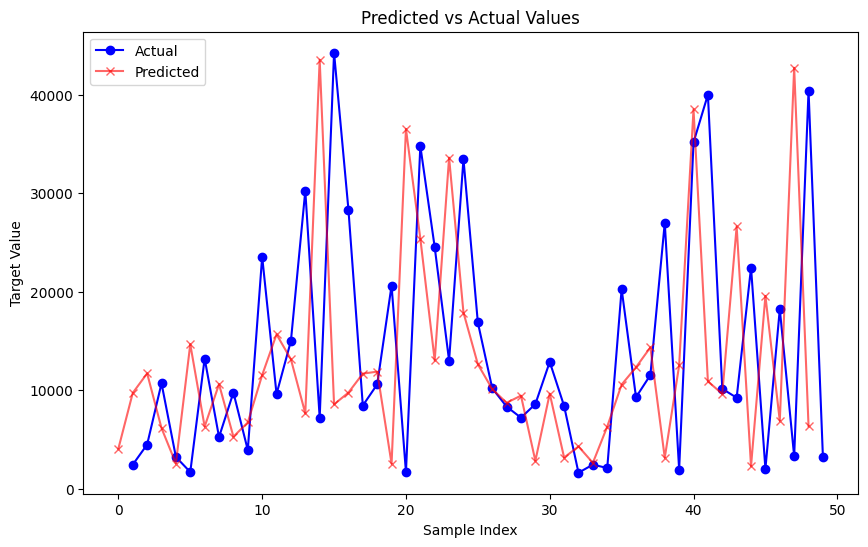

In [179]:
# Plot for Random ForestRegressor model between Actual values and predicted values for first 50 values of y_test 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting actual values
plt.plot(y_test.reset_index(drop=True)[1:50], label='Actual', color='blue', marker='o')

# Plotting predicted values
plt.plot(y_pred_rf[1:50], label='Predicted', color='red', alpha=0.6, marker='x')

plt.title('Predicted vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

#  AdaBoostRegressor

In [180]:
step1_preprocess = ColumnTransformer(transformers=[
    ('stand',MinMaxScaler(),[0,2])],remainder='passthrough')


In [181]:
from sklearn.ensemble import AdaBoostRegressor

model_ada_s = AdaBoostRegressor()

pipe_ada = Pipeline([
    ('step1_preprocess',step1_preprocess),
    ('model',model_ada_s)
])

In [182]:
from scipy.stats import randint
from scipy.stats import uniform

param_distributions = {
    'model__n_estimators': randint(50, 500),  # Searching in the range of 50 to 500
    'model__learning_rate': uniform(0.01, 1)  # Searching in the range of 0.01 to 1
}


In [183]:
from sklearn.model_selection import RandomizedSearchCV

# Setup RandomizedSearchCV
random_search_ada = RandomizedSearchCV(
    estimator=pipe_ada,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,  # Number of folds in cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Number of jobs to run in parallel. "-1" means using all processors.
)

# Assuming X_train and y_train are already defined
random_search_ada.fit(X_train, y_train)

# Best parameter set found
print("Best parameters:", random_search_ada.best_params_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


Best parameters: {'model__learning_rate': 0.02326496115986653, 'model__n_estimators': 138}


In [184]:
from sklearn.ensemble import AdaBoostRegressor

model_ada = AdaBoostRegressor(n_estimators=138,
                              learning_rate=0.02326496115986653)

pipe_ada = Pipeline([
    ('step1_preprocess',step1_preprocess),
    ('model',model_ada)
])

pipe_ada.fit(X_train,y_train)
y_pred_ada = pipe_ada.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred_ada))
print('Mae',mean_absolute_error(y_test,y_pred_ada))
print("RMSE",root_mean_squared_error(y_test,y_pred_ada))

R2 Score 0.8294803963187452
Mae 3861.1161999222763
RMSE 5086.4655433014095


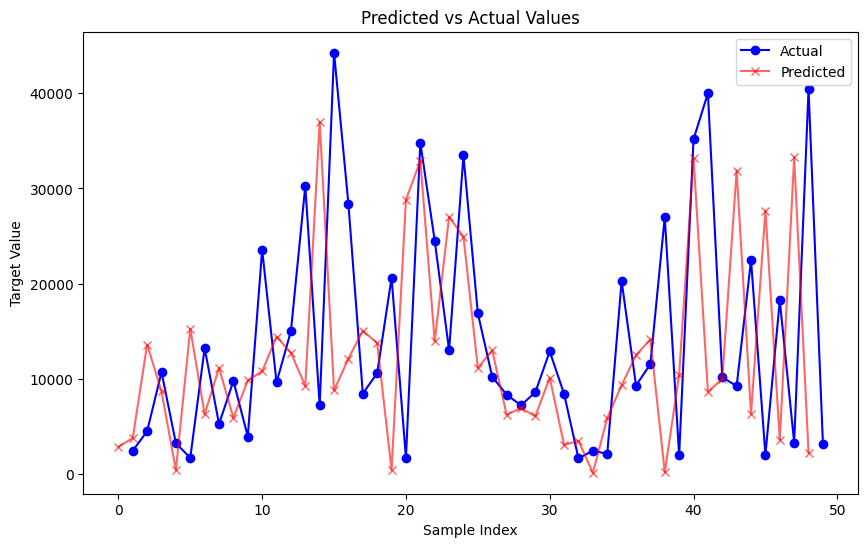

In [185]:
# Plot for AdaBoostRegressor model between Actual values and predicted values for first 50 values of y_test 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting actual values
plt.plot(y_test.reset_index(drop=True)[1:50], label='Actual', color='blue', marker='o')

# Plotting predicted values
plt.plot(y_pred_Lr[1:50], label='Predicted', color='red', alpha=0.6, marker='x')

plt.title('Predicted vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

# GradientBoostingRegressor

In [186]:
from sklearn.ensemble import GradientBoostingRegressor

step1_preprocess = ColumnTransformer(transformers=[
    ('stand',MinMaxScaler(),[0,2])],remainder='passthrough')
model_gbr_s = GradientBoostingRegressor()

pipe_gbr_s = Pipeline([
    ('step1_preprocess',step1_preprocess),
    ('model',model_gbr_s)
])

In [187]:
from scipy.stats import randint
from scipy.stats import uniform

# Defining the parameter distribution
param_dist = {
    'model__n_estimators': randint(100, 500),  # Number of trees
    'model__learning_rate': uniform(0.01, 0.2),  # Step size shrinkage used to prevent overfitting
    'model__max_depth': randint(3, 10),  # Maximum depth of the individual regression estimators
    'model__min_samples_split': randint(2, 11),  # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': randint(1, 11),  # Minimum number of samples required to be at a leaf node
    'model__max_features': ['auto', 'sqrt', 'log2', None],  # The number of features to consider when looking for the best split
    'model__subsample': uniform(0.5, 0.5)  # The fraction of samples to be used for fitting the individual base learners
}


In [188]:
from sklearn.model_selection import RandomizedSearchCV

# Setting up RandomizedSearchCV
random_search_gbr = RandomizedSearchCV(
    estimator=pipe_gbr_s,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,  # Number of folds in cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Number of jobs to run in parallel
)
# Fitting the model with Randomized Search CV
random_search_gbr.fit(X_train, y_train)

print("Best Parameters: ", random_search_gbr.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'model__learning_rate': 0.014116898859160489, 'model__max_depth': 4, 'model__max_features': None, 'model__min_samples_leaf': 6, 'model__min_samples_split': 3, 'model__n_estimators': 291, 'model__subsample': 0.9961057796456088}


In [189]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor(
    n_estimators=random_search_gbr.best_params_['model__n_estimators'],
    max_depth=random_search_gbr.best_params_['model__max_depth'],
    learning_rate=random_search_gbr.best_params_['model__learning_rate'],
    min_samples_split=random_search_gbr.best_params_['model__min_samples_split'],
    min_samples_leaf=random_search_gbr.best_params_['model__min_samples_leaf'],
    max_features=random_search_gbr.best_params_['model__max_features'],
    subsample=random_search_gbr.best_params_['model__subsample'],
    random_state=3 
    
)

pipe_gbr = Pipeline([('step1_preprocess',step1_preprocess),
                     ('model_gbr',model_gbr)])

pipe_gbr.fit(X_train, y_train)

y_pred_gb = pipe_gbr.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred_gb))
print('MAE',mean_absolute_error(y_test,y_pred_gb))
print("RMSE",root_mean_squared_error(y_test,y_pred_gb))


R2 Score 0.853695805605492
MAE 2591.2764894343886
RMSE 4711.479850256431


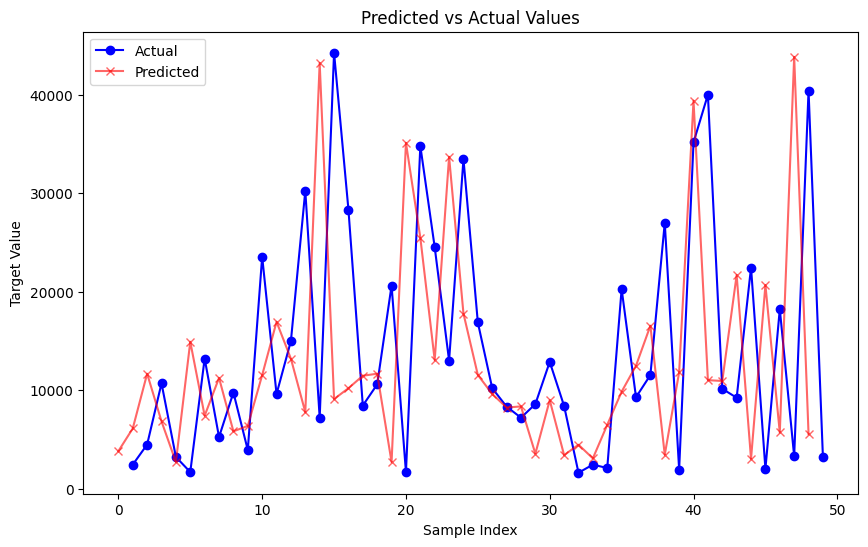

In [190]:
# Plot for GradientBoosting Regressor model between Actual values and predicted values for first 50 values of y_test 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting actual values
plt.plot(y_test.reset_index(drop=True)[1:50], label='Actual', color='blue', marker='o')

# Plotting predicted values
plt.plot(y_pred_gb[1:50], label='Predicted', color='red', alpha=0.6, marker='x')

plt.title('Predicted vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

In [191]:
# R2-Score, Mean absolute error and Root Mean Squared Error for Each Models

print('R2_Score For Linear Regression',r2_score(y_test,y_pred_Lr))
print('MAE For Linear Regression',mean_absolute_error(y_test,y_pred_Lr))
print("RMSE score for Linear Regression",root_mean_squared_error(y_test,y_pred_Lr))
print("\n")
print('R2 Score For Ridge Regression',r2_score(y_test,y_pred_ridge))
print('MAE Score For Ridge Regression',mean_absolute_error(y_test,y_pred_ridge))
print("RMSE score for Ridge Regression",root_mean_squared_error(y_test,y_pred_ridge))
print("\n")
print('R2 Score For Lasso Regression',r2_score(y_test,y_pred_lasso))
print('MAE Score For Lasso Regression',mean_absolute_error(y_test,y_pred_lasso))
print("RMSE score for Lasso Regression",root_mean_squared_error(y_test,y_pred_lasso))
print("\n")
print('R2 Score For K-Nearest Regressor',r2_score(y_test,y_pred_knn))
print('MAE Score For K-Nearest Regressor ',mean_absolute_error(y_test,y_pred_knn))
print("RMSE score for K-NearestNeighbour Regressor",root_mean_squared_error(y_test,y_pred_knn))
print("\n")
print('R2 Score For Decision Tree Regressor',r2_score(y_test,y_pred_dc))
print('MAE Score For Decision Tree Regressor',mean_absolute_error(y_test,y_pred_dc))
print("RMSE score for Decision Tree Regressor",root_mean_squared_error(y_test,y_pred_dc))
print("\n")
print('R2 Score For Random Forest Regressor',r2_score(y_test,y_pred_rf))
print('MAE Score For Random Forest Regressor',mean_absolute_error(y_test,y_pred_rf))
print("RMSE score for Random Forest Regressor",root_mean_squared_error(y_test,y_pred_rf))
print("\n")
print('R2 Score For AdaBoost Regressor',r2_score(y_test,y_pred_ada))
print('MAE Score For AdaBoost Regressor',mean_absolute_error(y_test,y_pred_ada))
print("RMSE score for AdaBoost Regressor",root_mean_squared_error(y_test,y_pred_ada))
print("\n")
print('R2 Score For Gradient Boosting Regressor',r2_score(y_test,y_pred_gb))
print('MAE Score For Gradient Boosting Regressor',mean_absolute_error(y_test,y_pred_gb))
print("RMSE score for Gradient Boosting Regressor",root_mean_squared_error(y_test,y_pred_gb))



R2_Score For Linear Regression 0.754878758544071
MAE For Linear Regression 4130.931002977002
RMSE score for Linear Regression 6098.449379824753


R2 Score For Ridge Regression 0.7508837625456537
MAE Score For Ridge Regression 4142.56236948545
RMSE score for Ridge Regression 6147.944913303642


R2 Score For Lasso Regression 0.7548787375439014
MAE Score For Lasso Regression 4130.929908492483
RMSE score for Lasso Regression 6098.449641059698


R2 Score For K-Nearest Regressor 0.7160741847525587
MAE Score For K-Nearest Regressor  4009.4520631888063
RMSE score for K-NearestNeighbour Regressor 6563.4380475651


R2 Score For Decision Tree Regressor 0.8390752405311273
MAE Score For Decision Tree Regressor 3016.871538759546
RMSE score for Decision Tree Regressor 4941.290465169473


R2 Score For Random Forest Regressor 0.850534083574843
MAE Score For Random Forest Regressor 2659.7019947419444
RMSE score for Random Forest Regressor 4762.116702282062


R2 Score For AdaBoost Regressor 0.82948039631

In [192]:
import pickle

pickle.dump(pipe_gbr,open('pipe_gbr1.pkl','wb'))